In [1]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load The Dataset
df = pd.read_excel("hotel_reviews.xlsx")
df.Rating=df.Rating.astype(int)

In [3]:
#Before doing any data imputations want to keep my original data safe.
df1=df.copy()


In [4]:
df1

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


We can see that Dataset is Very Large

# Exploratory Data Analysis  (EDA)

In [5]:
# Data Structure
df1.shape

(20491, 2)

As we can see, Dataset Contains 20491 Rows and 2 Columns in this Data

In [6]:
#Information about Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 240.3+ KB


In [7]:
# Checking Data types
df1.dtypes

Review    object
Rating     int32
dtype: object

Column names with its data types are displayed. Rating columns have float data type and Review column have object data type.

In [8]:
# Description of the Data
df1.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


 We See That There are 20491 observations in the data. The mean rating is close to 4.
 75% of the rating is below 5 and max value in rating column is 5. Hence there are no outliers in this data

In [9]:
df1.nunique()

Review    20491
Rating        5
dtype: int64

We have only 5 unique values of the variable Rating. So we will treat this problem as a unstrucutred classification problem. our task would be to train a model to classify a hotel review as 1,2,3,, or 5 stars.

In [10]:
df1['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

We can see that most ratings are 5-star ratings and the least are 1-star ratings. Thus we must take care to train our model on enough 1-star ratings. Thus while training the data, we must arrange our dataset. This will ensure that the distribution of all the classes is even between the train, validation, and test set. This will help prevent unknown classes from appearing in the validation or test set.

In [11]:
Rating_count=[9054,6039,2184,1793,1421]

In [12]:
for i in Rating_count: #20,491
    Perc = i/(20491)*100
    print(round(Perc))

44
29
11
9
7


Rating_5 = 44%, Rating_4 = 29%, Rating_3 = 11%, Rating_2 = 9%, Rating_1 = 7%

In [13]:
# Checking for Null
df1.isnull().mean()

Review    0.0
Rating    0.0
dtype: float64

There is no Data Missing.( No Null Values)

In [14]:
# Checking for Duplicated value
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20486    False
20487    False
20488    False
20489    False
20490    False
Length: 20491, dtype: bool

We Can See, No Duplicated Data

In [15]:
df1['Rating'].unique()

array([4, 2, 3, 5, 1])

#  Data Visualization

<AxesSubplot:ylabel='Density'>

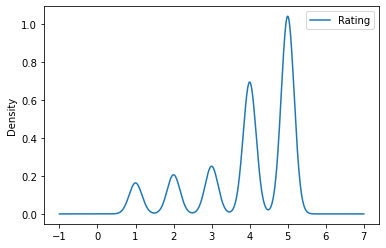

In [16]:
# Density Plot for Numerical Variable (Rating)
df1.plot(kind='kde')

<AxesSubplot:xlabel='Rating', ylabel='count'>

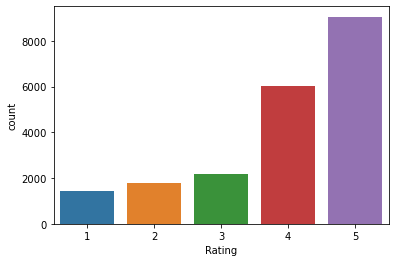

In [17]:
# Visualization Using countplot
sns.countplot(x = df1['Rating'])

<AxesSubplot:ylabel='Rating'>

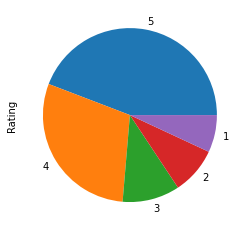

In [19]:
df1['Rating'].value_counts().plot(kind='pie')

from above three graphs,It can be seen that most of the people rated the hotel services with 5 stars and 4 stars. So according to the above ratings,
we can say that most of the people are satisfied with the services of the hotel they stayed. Now by analyzing the sentiments of hotel reviews.

# Pre-processing On Text Data

In [20]:
# Data Cleaning
import string    # special operations on strings
import spacy     # language models
import numpy as np

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt

import re     # regular expression
from wordcloud import WordCloud



In [21]:
df1

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


 we need to remove the special characters, numbers from the text. We can use the regular expression operations library of Python.

In [22]:
#df = [Review.strip() for Review in df.Review] # remove both the leading and the trailing characters

In [23]:
# Removes all special characters and numericals leaving the alphabets

def clean_Review(Review):
    Review = Review.lower()
    Review = re.sub('\[.*?\]','',Review)
    Review = re.sub('@[A-Za-z0–9]+', '', Review)  #Removing tag(@)
    Review = re.sub('#', '', Review)   #Removing hashtag(#)
    Review = re.sub('RT[\s]+', '', Review)  #Removing RT 
    Review = re.sub('https?:\/\/\S+', '', Review)  #Removing links
    Review = re.sub("[^A-Za-z" "]+"," ",Review).lower()  #remove special character
    Review = re.sub("[0-9" "]+"," ",Review)  #remove numbers
    Review=re.sub("\[.*?\]","",Review)
    Review=re.sub("[%s]" % re.escape(string.punctuation),'',Review)
    Review=re.sub("\w*\d\w*","",Review)
    Review=re.sub("\n","",Review)
    return Review

#any function whenever we want to apply it on the text data ,we can not directly apply it.for that we use lambda.
#lambda is an Intermediate function.

cleaned1 = lambda Review: clean_Review(Review)


we want to substract unwanted symbols,digits and spaces.so that purpose we use cleaning process. “clean” is the function that takes text as input and returns the text without any punctuation marks or numbers in it.

In [27]:
#Applying function to dataset

df1["Cleaned_Reviews"]=pd.DataFrame(df1.Review.apply(cleaned1)) # adding new column

In [28]:
df1

,Review,Rating,Cleaned_Reviews
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattle...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time staying charm not sta...
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,ok just looks nice modern outside desk staff n...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...


After cleaning our data look like this.all the special characters and the numbers are removed.

In [74]:
# word Frequency
freq = pd.Series(' '.join(df1['Review']).split()).value_counts()[:20]   # for top 20
freq

hotel        42079
not          30750
room         30532
great        18732
n't          18436
staff        14950
good         14791
did          13433
just         12458
stay         11376
no           11360
rooms        10935
nice         10918
stayed       10022
location      9515
service       8549
breakfast     8407
beach         8218
food          8026
like          7677
dtype: int64

In [75]:
# removing Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df1['Review'] = df1['Review'].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

In [77]:
# word frequency after removal of stopwords

freq_Sw = pd.Series(' '.join(df1['Review']).split()).value_counts()[:20]
freq_Sw

hotel        42079
room         30532
great        18732
n't          18436
staff        14950
good         14791
stay         11376
rooms        10935
nice         10918
stayed       10022
location      9515
service       8549
breakfast     8407
beach         8218
food          8026
like          7677
clean         7658
time          7615
really        7612
night         7596
dtype: int64

here we removing the stop words and display useful terms

# Feature Extraction

In [80]:
# counts vectoriser tells the frequency of a word

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer(min_df=1, max_df=0.9)
X =vectorizer.fit_transform(df1['Review'])

word_freq_df = pd.DataFrame({'term':vectorizer.get_feature_names(),'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['Frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])


In [79]:
word_freq_df.head(20)

,term,occurrences,Frequency
0,00,1444,6.978209e-04
1,000,138,6.668925e-05
2,0001,1,4.832554e-07
3,000__çî__x009d_e,3,1.449766e-06
4,000hope,1,4.832554e-07
5,000rp,5,2.416277e-06
6,000rupiah,1,4.832554e-07
7,000sf,1,4.832554e-07
8,000us,1,4.832554e-07
9,000year,1,4.832554e-07


In [83]:
# TF-IDF term freq inverse document frequency

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words ='english',max_features =1000,max_df =0.5,smooth_idf=True)
doc_vec = vectorizer.fit_transform(df1["Review"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist,columns=names_features)
df2

,00,10,100,11,12,14,15,20,2007,24,...,world,worse,worst,worth,wrong,year,years,yes,york,young
0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000
1,0.0,0.000000,0.0,0.068466,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000
2,0.0,0.000000,0.0,0.000000,0.085959,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000
4,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000
20487,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000
20488,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000
20489,0.0,0.027233,0.0,0.000000,0.000000,0.0,0.0,0.0,0.045175,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.095955,0.0,0.000000,0.0,0.041505


Here we convert our Data in a Structure format. In Tabular Numeric Format

# N-Gram

Bi-Gram

In [84]:

def get_top_n2_words(corups ,n =None):
    vec1 = CountVectorizer(ngram_range =(2,2),max_features = 2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word,sum_words[0,idx])for word ,idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq , key =lambda x:x[1] ,reverse = True)
    return words_freq[:n]

In [85]:
top2_words = get_top_n2_words(df1["Review"],n = 200)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-Gram" , "Freq"]
top2_df.head()

,Bi-Gram,Freq
0,staff friendly,2278
1,great location,2246
2,punta cana,1730
3,minute walk,1658
4,stayed night,1583


[Text(0, 0, 'staff friendly'),
 Text(1, 0, 'great location'),
 Text(2, 0, 'punta cana'),
 Text(3, 0, 'minute walk'),
 Text(4, 0, 'stayed night'),
 Text(5, 0, 'walking distance'),
 Text(6, 0, 'friendly helpful'),
 Text(7, 0, 'th floor'),
 Text(8, 0, 'staff helpful'),
 Text(9, 0, 'place stay'),
 Text(10, 0, 'highly recommend'),
 Text(11, 0, 'location great'),
 Text(12, 0, 'great time'),
 Text(13, 0, 'san juan'),
 Text(14, 0, 'great place'),
 Text(15, 0, 'food good'),
 Text(16, 0, 'good value'),
 Text(17, 0, 'definitely stay'),
 Text(18, 0, 'good location'),
 Text(19, 0, 'night stay')]

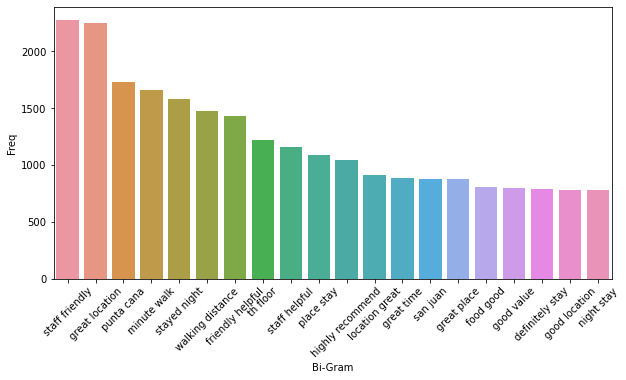

In [86]:
# Bi-Gram plot

import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10,5))
plot = sns.barplot(x =top20_bigram["Bi-Gram"],y = top20_bigram["Freq"])
plot.set_xticklabels(rotation = 45,labels=top20_bigram["Bi-Gram"])

Tri-Gram

In [91]:
def get_top_n3_words(corups ,n =None):
    vec1 = CountVectorizer(ngram_range =(3,3),max_features = 2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word,sum_words[0,idx])for word ,idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq , key =lambda x:x[1] ,reverse = True)
    return words_freq[:n]

In [92]:
top3_words = get_top_n3_words(df1["Review"],n = 200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-Gram" , "Freq"]
top3_df.head()

,Tri-Gram,Freq
0,staff friendly helpful,808
1,old san juan,364
2,flat screen tv,314
3,great place stay,283
4,king size bed,280


[Text(0, 0, 'staff friendly helpful'),
 Text(1, 0, 'old san juan'),
 Text(2, 0, 'flat screen tv'),
 Text(3, 0, 'great place stay'),
 Text(4, 0, 'king size bed'),
 Text(5, 0, 'good value money'),
 Text(6, 0, 'la carte restaurant'),
 Text(7, 0, 'staff helpful friendly'),
 Text(8, 0, 'easy walking distance'),
 Text(9, 0, 'free internet access'),
 Text(10, 0, 'returned night stay'),
 Text(11, 0, 'great location great'),
 Text(12, 0, 'minute walk away'),
 Text(13, 0, 'review trip advisor'),
 Text(14, 0, 'staff extremely helpful'),
 Text(15, 0, 'great location stayed'),
 Text(16, 0, 'staff extremely friendly'),
 Text(17, 0, 'clean staff friendly'),
 Text(18, 0, 'great great location'),
 Text(19, 0, 'great value money')]

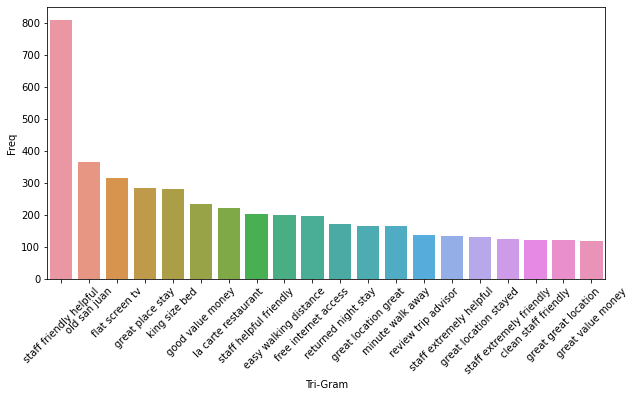

In [94]:
# Tri-Gram PLot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10,5))
plot = sns.barplot(x =top20_trigram["Tri-Gram"],y = top20_trigram["Freq"])
plot.set_xticklabels(rotation = 45,labels=top20_trigram["Tri-Gram"])

In [30]:
#importing libraries

In [95]:
#Stemming
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer 

In [96]:
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt')
stemmer=PorterStemmer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [97]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"nt","hotel","room"}
print(STOP_WORDS)

{'beyond', 'done', 'whether', 'another', 'under', 'nt', 'enough', 'back', 'whoever', 'if', 'whereas', 'my', 'with', 'except', 'whom', 'her', 'whereby', 'throughout', 'could', 'out', 'anywhere', 'third', 'own', 'alone', 'neither', 'whence', 'had', 'per', 'everywhere', 'they', 'through', 'whatever', 'formerly', "n't", 'for', 'ca', 'therein', 'upon', 'until', 'full', 'am', 'same', 'therefore', 'and', 'seem', 'one', 'something', "'m", 'latterly', 'also', 'are', 'already', 'its', 'below', 'when', 'seemed', 'thence', 'whither', 'various', 'into', 'everyone', 'thereupon', 'any', 'me', 'once', 'say', 'within', 'hence', 'last', 'itself', 'amount', 'mostly', 'never', 'but', 'what', 'nine', 'myself', 'those', 'than', '’s', 'these', 'of', 'using', 'why', 'against', 'either', 'each', 'during', 'ten', 'eight', 'no', 'somewhere', '‘ll', 'hereupon', 'whereupon', 'perhaps', 'latter', 'about', 'would', 'forty', 'this', 'will', '’ll', 'from', 'else', 'besides', 'as', 'by', 'even', 'really', 'made', 'them

In [98]:
#Performing lemmatization

In [99]:
Reviews1=df1.copy()
Reviews1.drop(["Review","Rating"],axis=1,inplace=True)
Reviews1["Cleaned_Reviews"][6]

'cozy stay rainy city husband spent nights monaco early january business trip chance come ride we booked monte carlo suite proved comfortable longish stay room located street building street noise not problem view interesting rooms building look dank alley midsection large office building suite comfortable plenty room spread bathroom attractive squeaky clean small comparison generous proportions sitting sleeping areas lots comfortable seating options good lighting plenty storage clothing luggage hotel staff friendly efficient housekeeping staff did great job pleasant requests responded quickly the location quite good easy walk pike street market seattle art museum notch shopping dining options a positive experience '

In [100]:
corpus=[]

In [101]:
for i in range  (0,len(Reviews1)):
    review=re.sub("[^a-zA-Z]"," ",Reviews1["Cleaned_Reviews"][i])
    
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in STOP_WORDS]
    review=" ".join(review)
    corpus.append(review)

In [102]:
corpus[10]

'poor value stayed monaco seattle july nice priced night take beating quotient experience simply average exceptional paying n t n t terribly disappointed wife stayed nicest suite night felt like overpaying best advice shop quality wise league average marriott nice best western'

In [103]:
df1["Cleaned_Review_Lemmatized"]=corpus

In [104]:
#Polarity and subjectivity#
import textblob
from textblob import TextBlob

In [105]:
df1["Polarity"]=df1["Cleaned_Review_Lemmatized"].apply(lambda x:TextBlob(x).sentiment.polarity)

In [106]:
df1["Subjectivity"]=df1["Cleaned_Review_Lemmatized"].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [107]:
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'

In [108]:
df1['polarity_score']=df1['Polarity'].\
   map(lambda x: sentiment(x))

In [109]:
pos = [5,4,3]
neg = [1]
neu=[2]

In [110]:
def sentiment(rating):
  if rating in pos:
    return "positive"
  elif rating in neg:
    return "negative"
  elif rating in neu:
      return "neutral"

In [111]:
df1['Sentiment'] = df1['Rating'].apply(sentiment)

In [112]:
df1.head(5)

,Review,Rating,Cleaned_Reviews,Cleaned_Review_Lemmatized,Polarity,Subjectivity,polarity_score,Sentiment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice expensive parking got good deal stay anni...,0.208744,0.687000,positive,positive
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok special charge diamond member hilton decide...,0.247282,0.525425,positive,neutral
2,nice rooms 4* experience hotel monaco seattle ...,3,nice rooms not experience hotel monaco seattle...,nice room experience monaco seattle good n t l...,0.266138,0.606239,positive,positive
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time monaco locati...,0.504825,0.691228,positive,positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,0.469643,0.627296,positive,positive


In [113]:
df1.Sentiment.value_counts()

positive    17277
neutral      1793
negative     1421
Name: Sentiment, dtype: int64

In [114]:
# let's see the percentage of different sentiment's class
 
# Creat
Df1_sentiment = pd.DataFrame(df1.Sentiment.value_counts(normalize=True)*100)
 
# calculating percentage
Df1_sentiment['Total'] = df1.Sentiment.value_counts()

In [115]:
Df1_sentiment

,Sentiment,Total
positive,84.315065,17277
neutral,8.750183,1793
negative,6.934752,1421


84% of reviews has positive sentiment, 9% has neutral sentimens and 7% has negative sentiments.

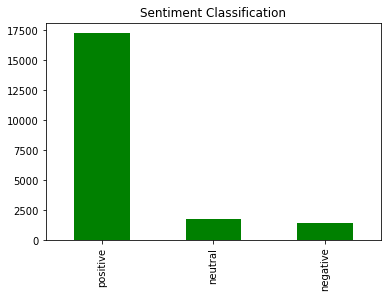

In [116]:
# let's see how many ratio of sentiment
df1.Sentiment.value_counts().plot(kind='bar', color='green')
plt.title('Sentiment Classification')
plt.show()

Text(0, 0.5, 'Subjectivity')

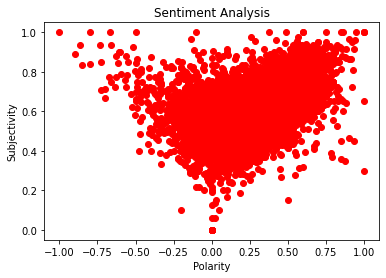

In [117]:
plt.scatter(df1.Polarity, df1.Subjectivity, color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [118]:
# most of them are on positive side and few of them are one negative side

In [119]:
####  Generate wordcloud

In [120]:
# Joining the list into one string/text
text = ' '.join(df1.Cleaned_Review_Lemmatized)
text[:1000]

'nice expensive parking got good deal stay anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non existent view clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay parking night ok special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard took printed reservation desk showed said thing like tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast got kidding embassy suit sitting bathroom bedroom unlike kimpton call suite day stay offer correct false advertising send kimpton preferred guest website email askin

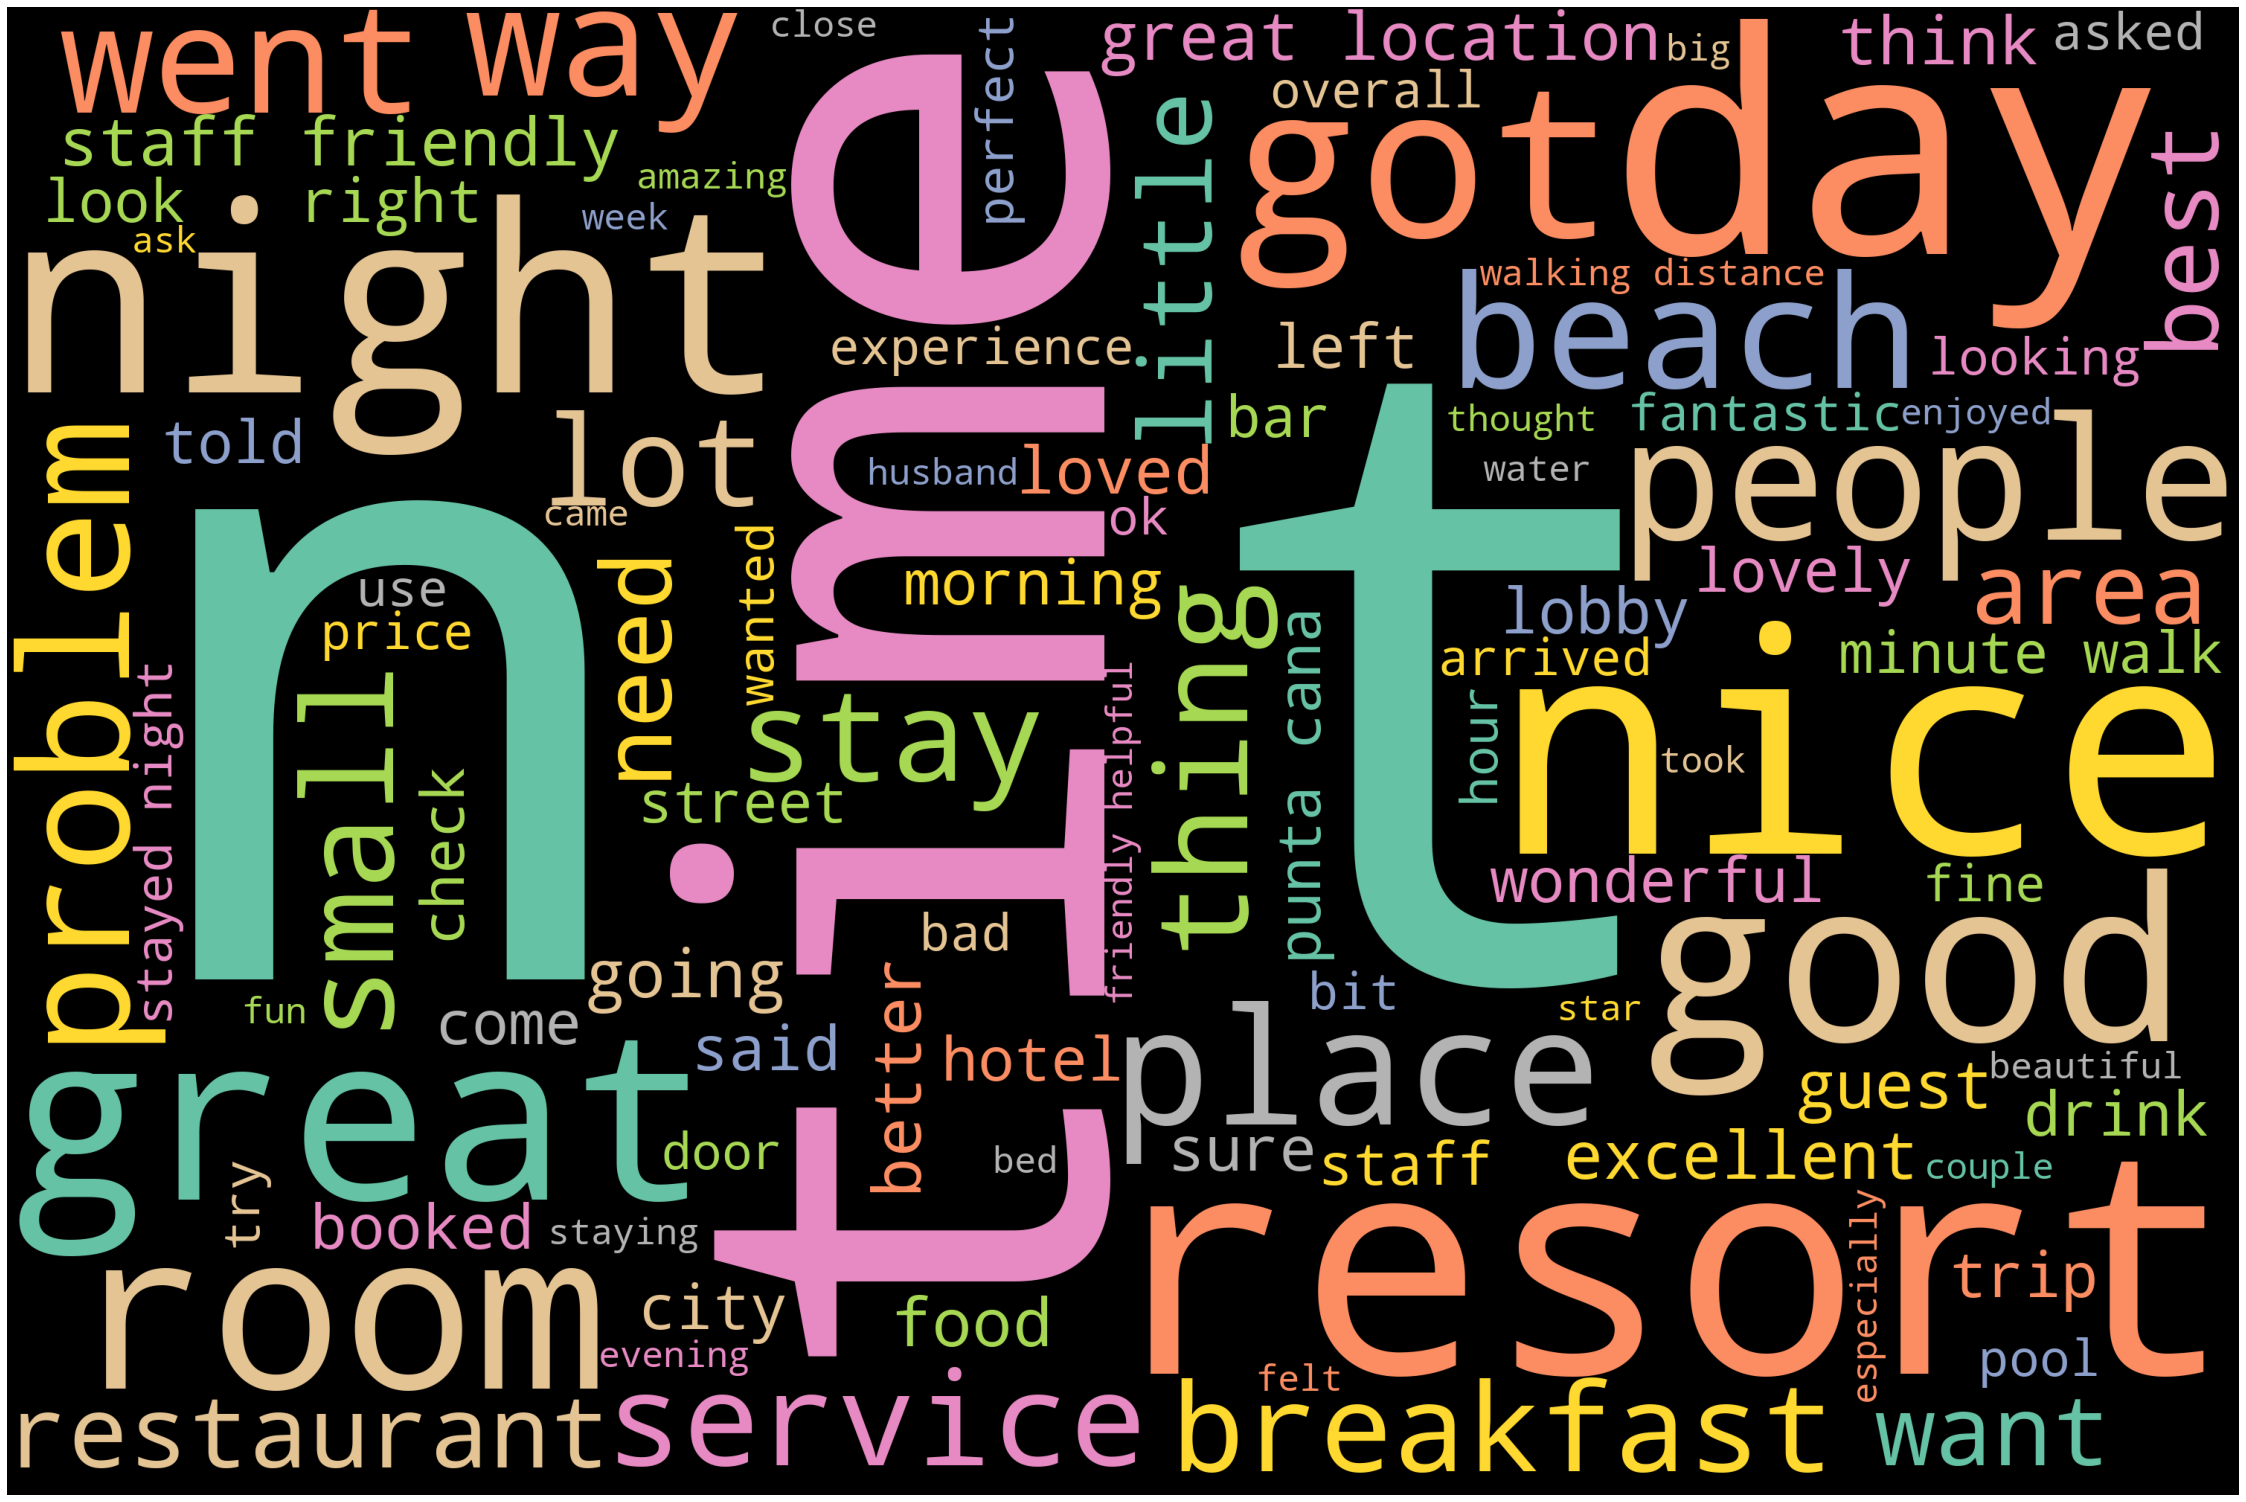

In [135]:
# Generate wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
stopwords = STOPWORDS
stopwords.add('will')
#wordcloud=WordCloud(width=3000,height=2000,background_color='black',
                   # max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)
def plot_cloud(wordcloud):
    plt.figure(figsize = (40,30))
    plt.imshow(wordcloud)
    plt.axis("off");

In [133]:
# we can see word like great, good, nice, staff friendly in wordcloud which imply positive emotions

In [134]:
# Save image to disk
wordcloud.to_file("wordcloud.jpeg")